# Lab 4 - Linear models

We focus on models in the form 

$$ y \sim \mathrm{Normal}(\alpha+X\beta,\sigma) $$



In [14]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd

## Excercise 1 - modelling height of !Kung people

### Normal model - no predictors
We will try to fit $\mathrm{Normal}(\mu,\sigma)$ distribution to height data. Special case of linear model with $\beta=0$.

In [2]:
_BASE_URL = 'https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data'
HOWELL_DATASET_PATH = f'{_BASE_URL}/Howell1.csv'
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
display(d.head())
display(d.describe())

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


,height,weight,age,male
count,352.000000,352.000000,352.000000,352.000000
mean,154.597093,44.990486,41.138494,0.468750
std,7.742332,6.456708,15.967855,0.499733
min,136.525000,31.071052,18.000000,0.000000
25%,148.590000,40.256290,28.000000,0.000000
50%,154.305000,44.792210,39.000000,0.000000
75%,160.655000,49.292693,51.000000,1.000000
max,179.070000,62.992589,88.000000,1.000000


## Task 1. Prior predictive checks

In [39]:
model_ppc=CmdStanModel(stan_file='stan_codes/height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

# Get DataFrame
df = sim.draws_pd()
display(df.head())

INFO:cmdstanpy:compiling stan file /home/Lab4/stan_codes/height_1_ppc.stan to exe file /home/Lab4/stan_codes/height_1_ppc
INFO:cmdstanpy:compiled model executable: /home/Lab4/stan_codes/height_1_ppc
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,mu,sigma,height
0,0.0,0.0,205.082,11.55440,190.381
1,0.0,0.0,179.276,7.22116,181.053
2,0.0,0.0,189.987,14.53070,204.094
3,0.0,0.0,183.554,11.19790,183.307
4,0.0,0.0,191.120,9.31575,188.222




1. Plot histograms of mu, sigma and simulated height.
2. Plot a joint distribution of mu and sigma.
3. Check if samples are consistent with priors.
4. Correct prior parameters to make them reasonably spreaded out. 
5. Check if observed data is possible to obtain using priors.

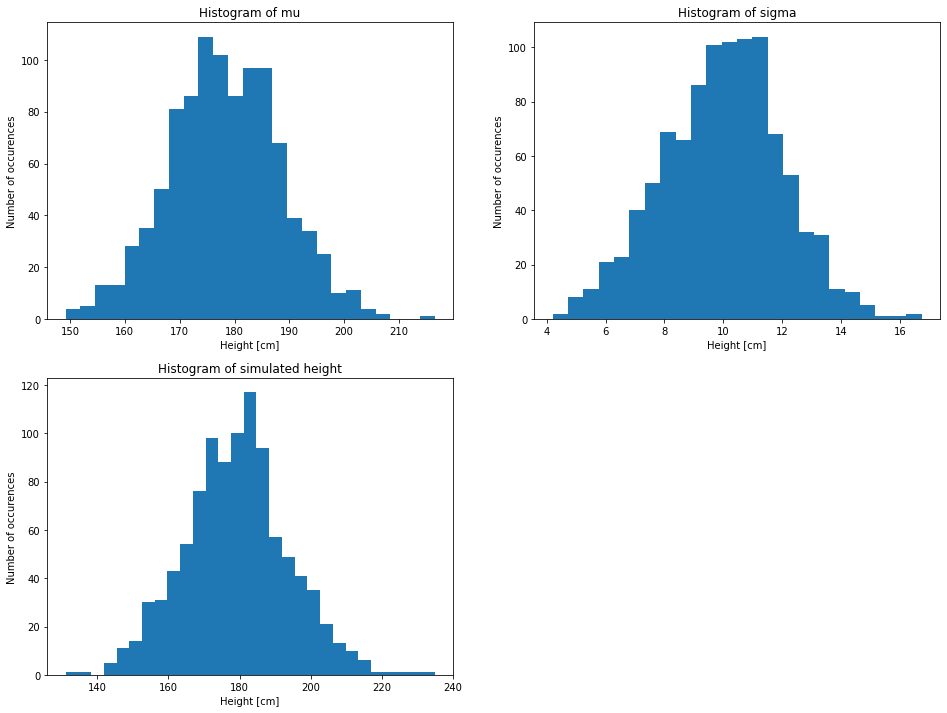

/tmp/ipykernel_32712/4058278171.py:19: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  joint_plt = sns.jointplot(df[['mu','sigma']],


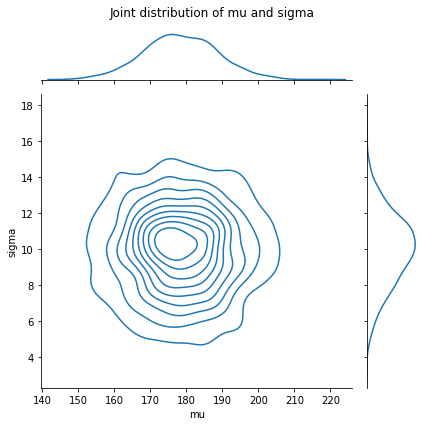

In [40]:
# 1.1 Histogram of mu, sigma and simulated height
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs[0, 0].hist(df['mu'], bins='auto')
axs[0, 0].set_title('Histogram of mu')
axs[0, 0].set_xlabel('Height [cm]')
axs[0, 0].set_ylabel('Number of occurences')
axs[0, 1].hist(df['sigma'], bins='auto')
axs[0, 1].set_title('Histogram of sigma')
axs[0, 1].set_xlabel('Height [cm]')
axs[0, 1].set_ylabel('Number of occurences')
axs[1, 0].hist(df['height'], bins='auto')
axs[1, 0].set_title('Histogram of simulated height')
axs[1, 0].set_xlabel('Height [cm]')
axs[1, 0].set_ylabel('Number of occurences')
axs[1, 1].axis('off')
plt.show()

# 1.2 Joint plot distribution of mu & sigma
joint_plt = sns.jointplot(df[['mu','sigma']],
              x=df['mu'],
              y=df['sigma'],
              kind='kde',
              ax=axs[1, 1])
joint_plt.figure.suptitle('Joint distribution of mu and sigma')
joint_plt.ax_joint.set_xlabel('mu')
joint_plt.ax_joint.set_ylabel('sigma')
plt.tight_layout()

In [41]:
# 1.3-1.5
print(f'Mean height = {(np.mean(df['height'].to_numpy())):.2f} cm')
print(f'Standard deviation of height = {(np.std(df['height'].to_numpy())):.2f} cm')

Mean height = 179.10 cm
Standard deviation of height = 14.53 cm


After adjusting some values, samples are now consistent with priors.  
Observed data is also possible to obtain with priors.

## Task 2. Model fit and evaluation

In [43]:
model_1_fit=CmdStanModel(stan_file='stan_codes/height_1_fit.stan')
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

# Get DataFrame
df_fit = fit.draws_pd()
display(df_fit.head())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,sigma,height
0,-897.267,0.970210,0.836764,1.0,3.0,0.0,897.837,154.705,7.76541,146.569
1,-897.772,0.864962,0.836764,1.0,3.0,0.0,898.208,154.395,8.04559,155.658
2,-897.429,0.989573,0.836764,2.0,3.0,0.0,897.982,154.401,7.73954,139.854
3,-897.561,0.905799,0.836764,1.0,3.0,0.0,898.153,154.715,8.02124,155.587
4,-898.440,0.766900,0.836764,2.0,3.0,0.0,900.808,154.079,7.58993,162.667



1. Plot a joint distribution of fitted mu and sigma.
2. Plot histograms of data and simulated heights and evaluate the quality of model.


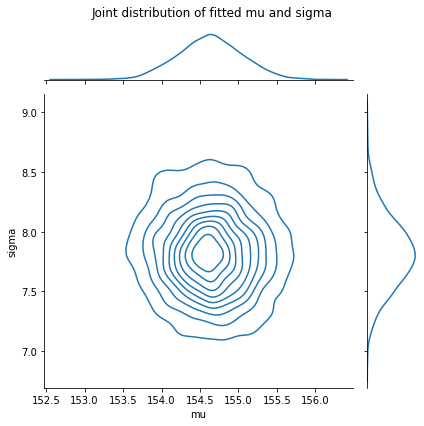

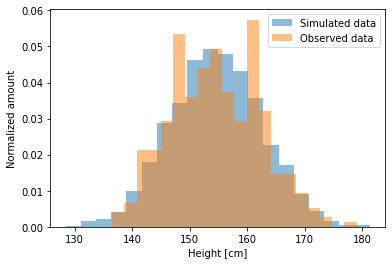

In [45]:
# 2.1 Joint distribution of fitted mu and sigma
joint_plt = sns.jointplot(df_fit[['mu', 'sigma']],
                          x=df_fit['mu'],
                          y=df_fit['sigma'],
                          kind='kde')
joint_plt.figure.suptitle('Joint distribution of fitted mu and sigma')
plt.tight_layout()
plt.show()

# 2.2 Historgram of data and simulated heights
fig, ax = plt.subplots(1, 1)
ax.hist(df_fit['height'], density=True, bins=20, alpha=0.5, label='Simulated data')
ax.hist(d['height'], density=True, bins=20, alpha=0.5, label='Observed data')
ax.legend()
ax.set(xlabel='Height [cm]', 
       ylabel='Normalized amount')
plt.show()

As seen on above histograms - posterior prediction for data is nicely fitted.

## Task 3. Adding predictor to the model - weight

Create column ```c_weight``` in the dataframe containing weights substrated by their mean.


In [46]:
d['c_weight'] = d['weight'] - d['weight'].mean()
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}


## Task 4. Prior predictive checks
 

In [48]:
model_ppc=CmdStanModel(stan_file='stan_codes/height_2a_ppc.stan')
R = 1000
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

# Get DataFrame
df_ppc = sim.draws_pd()
display(df_ppc.describe())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,alpha,beta,sigma,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
count,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.0,0.0,178.036727,0.207534,14.729969,174.695765,175.624667,174.961039,176.200697,175.335034,...,180.381699,179.806726,180.047839,180.947268,180.906324,181.515793,181.386733,181.136590,181.158120,181.091967
std,0.0,0.0,10.056879,10.060455,14.509960,141.732462,135.448145,128.072451,121.984122,116.793893,...,123.228279,130.355245,137.633162,143.347661,150.135796,156.965934,161.932904,169.470614,175.723172,182.347436
min,0.0,0.0,149.696000,-35.014200,0.003578,-285.791000,-250.059000,-221.727000,-202.028000,-249.228000,...,-251.053000,-267.705000,-300.265000,-300.333000,-357.728000,-342.694000,-413.365000,-429.246000,-463.498000,-455.873000
25%,0.0,0.0,171.157750,-6.102715,4.240158,73.864300,76.793500,85.523225,89.411850,91.253275,...,97.705875,95.953125,89.099800,88.578225,85.074775,80.053975,76.157025,71.534250,66.678025,63.599900
50%,0.0,0.0,177.902000,-0.378144,10.131550,183.637500,184.947000,180.804500,182.980500,181.271000,...,175.546000,173.068500,174.350000,171.854000,172.637000,173.633000,174.587000,177.536500,176.028500,172.470000
75%,0.0,0.0,184.722000,7.175515,20.386800,265.009000,264.479000,257.256250,252.811000,249.552000,...,265.629000,273.142500,273.521500,279.670250,283.266500,289.670750,288.147500,297.752500,300.202750,309.438000
max,0.0,0.0,216.986000,32.801700,90.768200,653.291000,687.055000,605.931000,612.915000,597.055000,...,572.214000,617.462000,632.247000,650.544000,688.194000,702.062000,727.664000,752.596000,738.469000,801.033000


Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

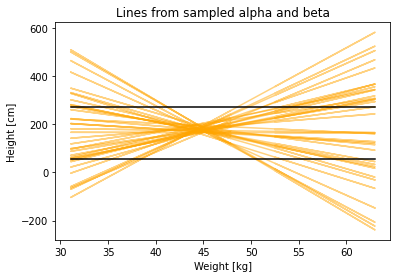

In [52]:
# Extract alpha and beta
alpha = df_ppc['alpha'].tolist()[:35]
beta = df_ppc['beta'].tolist()[:35]

# Data from Wikipedia
smallest_person = 55
tallest_person = 272    

fig, ax = plt.subplots(1, 1)
# Plot sampled slopes
for i in range(0,len(beta)):
    f = lambda x: alpha[i] + x * beta[i]
    ax.plot(d['weight'], f(d['c_weight']), alpha=0.5, color='orange')
# Plot lines for smallest and tallest
ax.plot([d['weight'].min(), d['weight'].max()], [smallest_person, smallest_person], 'k')
ax.plot([d['weight'].min(), d['weight'].max()], [tallest_person, tallest_person], 'k')
ax.set(title='Lines from sampled alpha and beta',
       xlabel='Weight [kg]',
       ylabel='Height [cm]')
plt.show()

Modeled preditect heights (`orange lines`) don't lie withing range of natural heights (`black lines`)

## Task 5. Modifying prior

If prior for beta admits negative values, then it makes no sense. Lets change prior to lognormal distribution.


In [54]:
model_ppc=CmdStanModel(stan_file='stan_codes/height_2b_ppc.stan')
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

# Get DataFrame
df_ppc = sim.draws_pd()
display(df_ppc.describe())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,alpha,beta,sigma,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
count,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.0,0.0,178.036727,1.697292,14.729969,153.959197,155.858590,156.165501,158.375684,158.480501,...,198.465821,198.861358,200.072987,201.942922,202.872507,204.452521,205.293965,206.014330,207.006397,207.910736
std,0.0,0.0,10.056879,2.280632,14.509960,39.329755,38.493764,35.626249,35.347539,34.478499,...,35.476928,37.684611,39.192377,39.783283,41.133847,43.252685,42.997124,44.580371,45.090085,46.804728
min,0.0,0.0,149.696000,0.030154,0.003578,-199.193000,-167.513000,-134.170000,-127.588000,-178.841000,...,19.984000,44.518300,56.703500,35.719700,94.568600,75.624100,85.679500,45.464100,91.297700,45.515400
25%,0.0,0.0,171.157750,0.543203,4.240158,142.272750,141.391500,144.258250,144.989000,144.372500,...,179.234750,179.442250,179.804500,181.043250,181.353250,181.297250,182.169000,184.159250,183.397000,182.798500
50%,0.0,0.0,177.902000,0.962892,10.131550,160.164500,161.272000,162.066000,162.468500,162.180000,...,192.490500,193.360000,194.319500,194.742500,195.893500,196.796000,196.948500,198.119000,198.298000,198.788000
75%,0.0,0.0,184.722000,2.049410,20.386800,173.510500,175.696250,174.857500,176.687250,176.512500,...,211.044250,211.072000,211.781000,214.406500,215.077750,218.312500,217.988250,219.528750,219.925750,222.296750
max,0.0,0.0,216.986000,26.580300,90.768200,329.518000,331.890000,288.666000,309.977000,308.750000,...,482.231000,537.888000,548.620000,551.926000,596.460000,606.275000,597.970000,621.925000,598.245000,655.544000


1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data. Is observed data possible within the prior model?

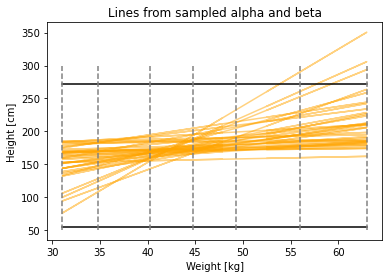

In [56]:
# Extract alpha and beta
alpha = df_ppc['alpha'].tolist()[:35]
beta = df_ppc['beta'].tolist()[:35]

# Data from Wikipedia
smallest_person = 55
tallest_person = 272    

fig, ax = plt.subplots(1, 1)
# 5.1 Plot sampled slopes
for i in range(0,len(beta)):
    f = lambda x: alpha[i] + x * beta[i]
    ax.plot(d['weight'], f(d['c_weight']), alpha=0.5, color='orange')
# 5.1 Plot lines for smallest and tallest
ax.plot([d['weight'].min(), d['weight'].max()], [smallest_person, smallest_person], 'k')
ax.plot([d['weight'].min(), d['weight'].max()], [tallest_person, tallest_person], 'k')
# 5.2 Plot quintiles
for q in np.quantile(d['weight'], [0.05, 0.25, 0.5, 0.75, 0.95]):
    plt.plot([q, q], [50, 300], '--', color='gray')
plt.plot([d['weight'].min(), d['weight'].min()], [50, 300], '--', color='gray')
plt.plot([d['weight'].max(), d['weight'].max()], [50, 300], '--', color='gray')

ax.set(title='Lines from sampled alpha and beta',
       xlabel='Weight [kg]',
       ylabel='Height [cm]')
plt.show()

After changing to lognormal distribution, observed data is possible withing prior model.

## Task 6. Fitting and evaluating model


In [58]:
model_2_fit=CmdStanModel(stan_file='stan_codes/height_2_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


1. Create ```data_fit``` dictionary containing data from  ```N``` first rows of dataframe


In [59]:
N = 50
data_fit = {'N': N, 'weight': d.weight.iloc[:N].values, 'heights': d.height.iloc[:N].values}
fit=model_2_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)







chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


2. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)
2. For each value of weight plot mean simulated height along with errorbar of one standard deviation (use ```errorbar``` from matplotlib). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status





chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status








chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▍    | 00:01 Iteration: 1000 / 2000 [ 50%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)





chain 1 |█████████ | 00:02 Iteration: 1700 / 20


INFO:cmdstanpy:CmdStan done processing.


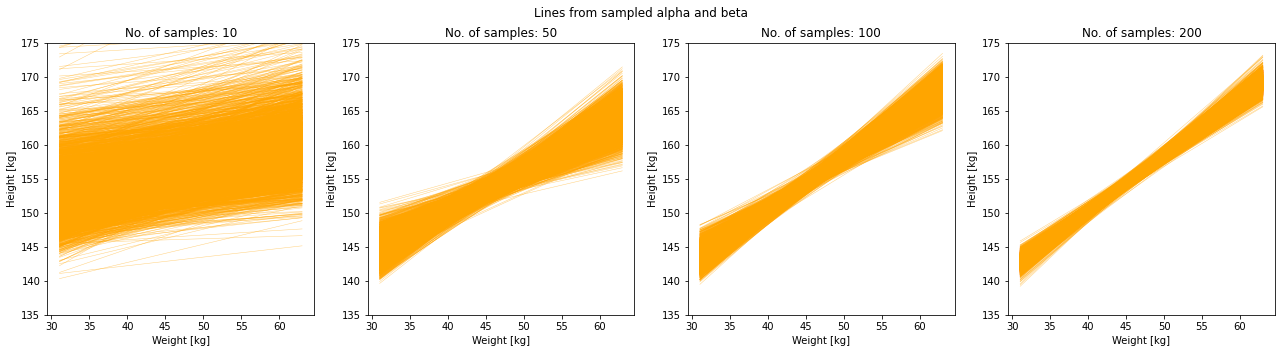

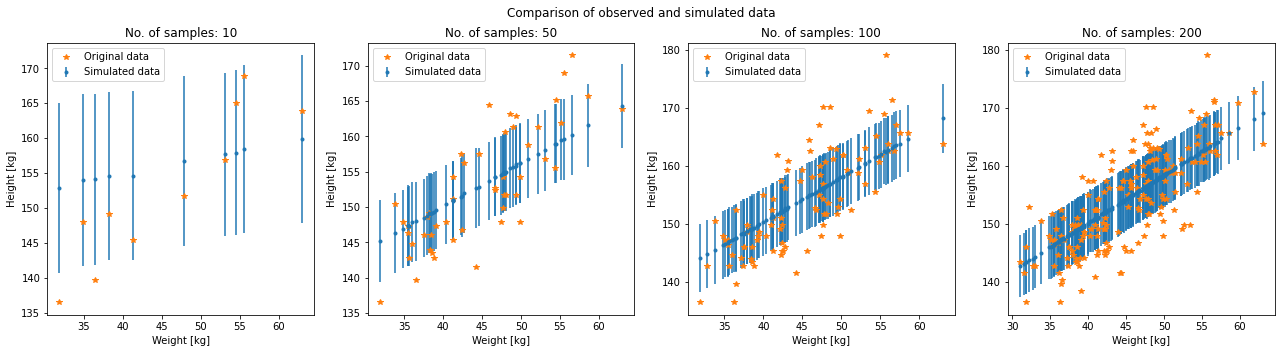

In [65]:
# Data from Wikipedia
smallest_person = 55
tallest_person = 272

list_of_Ns = [10, 50, 100, 200]
min_weight, max_weight = d.weight.min(),d.weight.max()

fig, axes = plt.subplots(1, len(list_of_Ns), figsize=(22, 5))
fig2, axes2 = plt.subplots(1, len(list_of_Ns), figsize=(22, 5))
axes = axes.flatten()
for (idx, N) in enumerate(list_of_Ns):

    data_fit = {'N': N, 'weight': d.weight.iloc[:N].values, 'heights': d.height.iloc[:N].values}
    fit=model_2_fit.sample(data=data_fit,seed=28052020)
    df_fit = fit.draws_pd()

    # 6.2 Sampled slopes for beta and alpha
    fig.suptitle('Lines from sampled alpha and beta')
    axes[idx].plot([min_weight,max_weight],
                   [df_fit['alpha']+df_fit['beta']*min_weight,
                    df_fit['alpha']+df_fit['beta']*max_weight],
                    linewidth=0.5, alpha=0.5,
                    color='orange')
    axes[idx].set_ylim(135,175)
    axes[idx].set(title=f'No. of samples: {N}',
                  xlabel='Weight [kg]',
                  ylabel='Height [kg]')


    # 6.3 Errorbars
    fig2.suptitle('Comparison of observed and simulated data')
    df_fit = df_fit.describe()
    axes2[idx].errorbar(d.weight.iloc[:N].values,
                        df_fit.loc[['mean']].iloc[:,-N:].to_numpy()[0],
                        yerr=df_fit.loc[['std']].iloc[:,-N:].to_numpy()[0],
                        fmt='.',
                        label='Simulated data')
    axes2[idx].plot(d.weight.iloc[:N].values,d.height.iloc[:N].values,
                    '*', label='Original data')
    axes2[idx].set(title=f'No. of samples: {N}',
                   xlabel='Weight [kg]',
                   ylabel='Height [kg]')
    axes2[idx].legend()
plt.show()

## Task 7. Extending the model

1. Center the weight data (substract mean vaule of weight from all values). Test how model works for such data. What is the interpretation of $\alpha$ in such case?
2. Using centered data modify your model with a second power of weight, select prior for its coefficient using prior predictive checks and after fitting check if model is still good.
3. Try to vectorize the model to avoid necessity of a for loop in the ```model``` block. 

In [78]:
# 7.1 Center the data
model_2_fit=CmdStanModel(stan_file='stan_codes/height_2_fit.stan')
N = 50
data_fit = {'N': N, 'weight': d.c_weight.iloc[:N].values, 'heights': d.height.iloc[:N].values}
fit=model_2_fit.sample(data=data_fit,seed=28052020)

# Get DataFrame
df_fit = fit.draws_pd()
min_weight, max_weight = d.c_weight.min(), d.c_weight.max()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


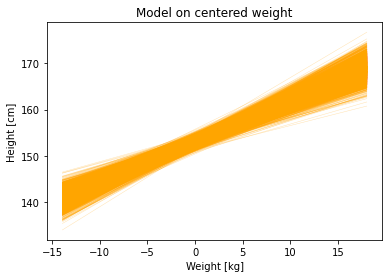

In [79]:
fig, ax = plt.subplots(1, 1)
ax.plot([min_weight,max_weight],
         [df_fit['alpha']+df_fit['beta']*min_weight, df_fit['alpha']+df_fit['beta']*max_weight],
         linewidth=0.5, alpha=0.3, color='orange')
ax.set(title='Model on centered weight',
       xlabel='Weight [kg]',
       ylabel='Height [cm]')
plt.show()

In [80]:
# 7.2 Prior predictive checks on centered data
model_3_ppc=CmdStanModel(stan_file='stan_codes/height_3_ppc.stan')

R=1000
min_weight,max_weight = d.c_weight.min(),d.c_weight.max()

data_sim = data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
sample = model_3_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

# Get DataFrame
df_sample = sample.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


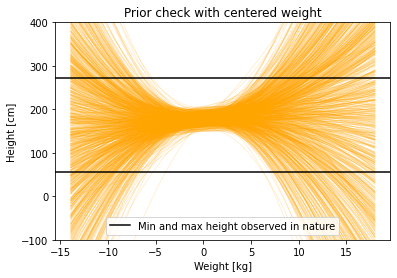

In [81]:
x = np.linspace(min_weight, max_weight, 1000)

# Data from Wikipedia
smallest_person = 55
tallest_person = 272

fig, ax = plt.subplots(1, 1)
for i in range(1000):
    ax.plot(x,
            df_sample['alpha'][i] + df_sample['beta'][i]*x + df_sample['beta2'][i]*(x**2),
            linewidth=0.5, alpha=0.3, color='orange')
ax.axhline(y=tallest_person, color='k', label='Min and max height observed in nature')
ax.axhline(y=smallest_person, color='k')
ax.set_ylim(-100,400)
ax.set(title='Prior check with centered weight',
       xlabel='Weight [kg]',
       ylabel='Height [cm]')
ax.legend(loc='best')
plt.show()

In [91]:
# 7.2 Model fitting
model_3_fit=CmdStanModel(stan_file='stan_codes/height_3_fit.stan')
N = 50
data_fit = {'N': N, 'weight': d.weight.iloc[:N].values, 'heights': d.height.iloc[:N].values}
fit=model_3_fit.sample(data=data_fit,seed=28052020)

# Get DataFrame
df_fit = fit.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status











chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████     | 00:02 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:02 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                 


INFO:cmdstanpy:CmdStan done processing.


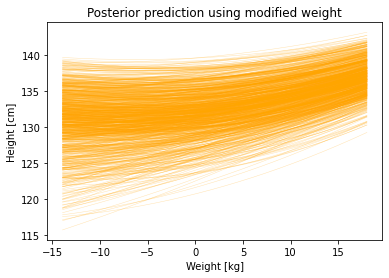

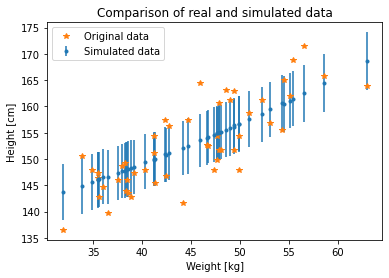

In [93]:
min_weight,max_weight = d.weight.min(),d.weight.max()

# Sampled slopes
fig, ax = plt.subplots(1, 1)
for iter in range(1000):
    ax.plot(x, df_fit['alpha'][iter] + df_fit['beta'][iter]*x + df_fit['beta2'][iter]*(x**2),
            linewidth=0.5, alpha=0.3, color='orange')
ax.set(title='Posterior prediction using modified weight',
        xlabel='Weight [kg]',
        ylabel='Height [cm]')
plt.show()


# Errorbars
df_fit_desc = df_fit.describe()
fig, ax = plt.subplots(1, 1)
ax.errorbar(d.weight.iloc[:N].values,
            df_fit_desc.loc[['mean']].iloc[:,-N:].to_numpy()[0],
            yerr=df_fit_desc.loc[['std']].iloc[:,-N:].to_numpy()[0],
            fmt='.', label='Simulated data')
ax.plot(d.weight.iloc[:N].values,
        d.height.iloc[:N].values,
        '*', label='Original data')
ax.legend(loc='best')
ax.set(title='Comparison of real and simulated data',
       xlabel='Weight [kg]',
       ylabel='Height [cm]')
plt.show()